In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import IFrame, display

In [9]:
file = 'Lectures/Cuadratura_Gaussiana.pdf'
#IFrame(file, width=600, height=400)

In [25]:
deg = 6
x, w = np.polynomial.legendre.leggauss(deg)
print(x)
print(w)

[-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
[0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]


In [26]:
a = 0
b = 0.5*np.pi

f = lambda x : np.cos(x)
print(f(0.))

1.0


In [27]:
t = 0.5*( (b-a)*x + a + b )
Integral = 0.5*(b-a)*sum( w*f(t))

In [28]:
print(Integral)

0.9999999999999535


In [29]:
import sympy as sym

In [30]:
x = sym.Symbol('x', real=True)
funcion = sym.sqrt(x**2+1)
dfuncion = sym.diff(funcion,x)
d2funcion = sym.diff(dfuncion,x)

In [31]:
print(funcion, dfuncion, d2funcion)

(sqrt(x**2 + 1), x/sqrt(x**2 + 1), -x**2/(x**2 + 1)**(3/2) + 1/sqrt(x**2 + 1))


In [33]:
# Convertir en numerico

fn = sym.lambdify([x], funcion, 'numpy')
dfn = sym.lambdify([x], dfuncion, 'numpy')
d2fn = sym.lambdify([x], d2funcion, 'numpy')

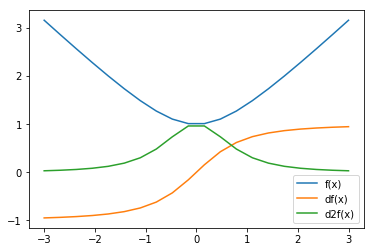

In [36]:
x = np.linspace(-3,3,20)
plt.plot(x,fn(x),x,dfn(x),x,d2fn(x))
plt.legend(['f(x)','df(x)','d2f(x)'])
plt.show()

In [38]:
def CreateLegendPoly(n):
    x = sym.Symbol('x', real=True)
    y = sym.Symbol('y', real=True)
    
    y = (x**2-1)**n
    poly = sym.diff(y,x,n)/( 2**n * math.factorial(n) )
    
    return poly

In [41]:
poly2 = CreateLegendPoly(3)

In [42]:
print(poly2)

x*(5*x**2 - 3)/2
